# Notebook Setup

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, Math


import numpy as np
import matplotlib.pyplot as plt

import os
import sys

sys.path.insert(1, '../')

from moments_toolkit import moments_toolkit

from moments_toolkit import ratio_formula, sum_ratios_formula

import gvar as gv

#from utilities import plateau_search_symm

import itertools as it

import correlatoranalyser as CA

from moments_toolkit import average_moments_over_T
from utilities import jackknife_resamples, bootstrap_resamples

In [2]:
p3fold = os.environ['mount_point_path'] + "48c48/binned_1012_hmz370_BMW_extended/3PointCorrelation/"
p2fold = os.environ['mount_point_path'] + "48c48/binned_1012_hmz370_BMW_extended/2PointCorrelation/"


opAnalyzer1 = moments_toolkit(p3fold, p2fold,
                            skip3p=False, skipop=False,
                            verbose=True,
                            fast_data_folder = "../fast_data_extended_p0_q0",
                            operator_folder= "../operator_database",
                            momentum='PX0_PY0_PZ0',
                            insertion_momentum = 'qx0_qy0_qz0',
                            tag_2p='hspectrum',
                            max_n=2 #max_n=3
                            )


opAnalyzer2 = moments_toolkit(p3fold, p2fold,
                            skip3p=False, skipop=False,
                            verbose=True,
                            fast_data_folder = "../fast_data_extended_px-2_q0",
                            operator_folder= "../operator_database",
                            momentum='PX-2_PY0_PZ0',
                            insertion_momentum = 'qx0_qy0_qz0',
                            tag_2p='hspectrum',
                            max_n=2 #max_n=3
                            )


Initializing the moments_toolkit class instance...


Initializing the building block class instance...


Reading the the keys of the dataset ...


Reading the 2 point and 3 point correlators from the fast access dataset ...


Reading the list of all the available operators from the database...


Class Initialization Complete!


Initializing the moments_toolkit class instance...


Initializing the building block class instance...


Reading the the keys of the dataset ...


Reading the 2 point and 3 point correlators from the fast access dataset ...


Reading the list of all the available operators from the database...


Class Initialization Complete!



In [3]:
for opAnalyzer in [opAnalyzer1,opAnalyzer2]:
    opAnalyzer.set_resampling_type('jackknife')
    #opAnalyzer.set_resampling_type('bootstrap')
    opAnalyzer.set_fit_parms(central_value_fit=True, central_value_fit_correlated=True, resample_fit=True, resample_fit_correlated=True)
    opAnalyzer.remove_T(12)

    # #we take the operators of the paper

    # opV1 = 1/6 * opAnalyzer.get_operator(2)
    # opV2 = 1/(3 * np.sqrt(2)) * (opAnalyzer.get_operator(2) - opAnalyzer.get_operator(3))
    # opV3 = 1/np.sqrt(2) * opAnalyzer.get_operator(14)

    # opA1 = 1/np.sqrt(2) * opAnalyzer.get_operator(28)
    # opA2 = 1/np.sqrt(2) * opAnalyzer.get_operator(32)

    # opT1 = opAnalyzer.get_operator(74) + 1/2 * opAnalyzer.get_operator(78)
    # opT2 = opAnalyzer.get_operator(78)
    # opT3 =  1/6 * ( -3 * opAnalyzer.get_operator(83) + 2 * opAnalyzer.get_operator(87) + 3* opAnalyzer.get_operator(91) + opAnalyzer.get_operator(95) )
    # opT4 = 1/2 * ( opAnalyzer.get_operator(83) + 2 * opAnalyzer.get_operator(87) -2* opAnalyzer.get_operator(91) )



    # #we empty the selected op just to be sure
    # opAnalyzer.deselect_operator()

    # #we append the operators
    # opAnalyzer.append_operator(opV1)
    # opAnalyzer.append_operator(opV2)
    # opAnalyzer.append_operator(opV3)
    # opAnalyzer.append_operator(opA1)
    # opAnalyzer.append_operator(opA2)
    # opAnalyzer.append_operator(opT1)
    # opAnalyzer.append_operator(opT2)
    # opAnalyzer.append_operator(opT3)
    # opAnalyzer.append_operator(opT4)

    #opAnalyzer.append_operator(opAnalyzer.get_operator(125))

    opAnalyzer.focus_paper_operators(verbose=True)


    # #we deselect the op with 0 kin factor
    # Klist = opAnalyzer.get_Klist()
    # eliminate_op = [op for op,kin in zip(opAnalyzer.selected_op,Klist) if np.abs( kin.mean ) == 0]
    # for op in eliminate_op:
    #     opAnalyzer.deselect_operator(op)

    opAnalyzer.remove_zeroK_operators(verbose=True)


    Klist = opAnalyzer.get_Klist()


    opAnalyzer.display_operators()


The one derivate operators used in the paper have been selected for the analysis.


Deselected all the operators with kinematic factor equal to 0. The analysis can now be carried on assumin a non zero kinematical factor for each operator.



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


The one derivate operators used in the paper have been selected for the analysis.


Deselected all the operators with kinematic factor equal to 0. The analysis can now be carried on assumin a non zero kinematical factor for each operator.



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
opAnalyzer1
opAnalyzer2

Instance of the moments_toolkit class

Dataset Specifics:
Number of configurations: 212
P: [0 0 0]
q: [0 0 0]

Current Selection of Parameters:
Number of Selected Operators: 5
Selected Isospin: U-D
Selected T values: [3, 4, 5, 6, 7, 8, 10]

Fit parameters:
 - Central Value Fit:            True
 - Central Value Fit Correlated: True
 - Resample Fit:                 True
 - Resample Fit Correlated:      True
 - Resample Fit Resample Prior:  False
 - SVD Cut: None
 - Max Iterations: 10000

Resampling Technique: jackknife

Instance of the moments_toolkit class

Dataset Specifics:
Number of configurations: 212
P: [-2  0  0]
q: [0 0 0]

Current Selection of Parameters:
Number of Selected Operators: 9
Selected Isospin: U-D
Selected T values: [3, 4, 5, 6, 7, 8, 10]

Fit parameters:
 - Central Value Fit:            True
 - Central Value Fit Correlated: True
 - Resample Fit:                 True
 - Resample Fit Correlated:      True
 - Resample Fit Resample Prior:  False
 - SVD Cut: None
 - Max Iterations: 10000

Resampling Technique: jackknife

In [5]:
opAnalyzer1.pre_do_computations(verbose=True)


Performing the two-point correlator fit to compute E, m, and the kinematic factors, ...


Performing the two-point correlator fit to compute dE, ...


Computing matrix elements and moments from the summed ratios ...


Computing matrix elements and moments from the 2 state fit of the ratios ...



# Intermediate Results


Preparing the fit for the ratio of the correlators...


Looping over the operators, performing for each a series of fit: ...



100%|██████████| 5/5 [01:03<00:00, 12.64s/it]



Plotting the fit of the ratios for each operator ...



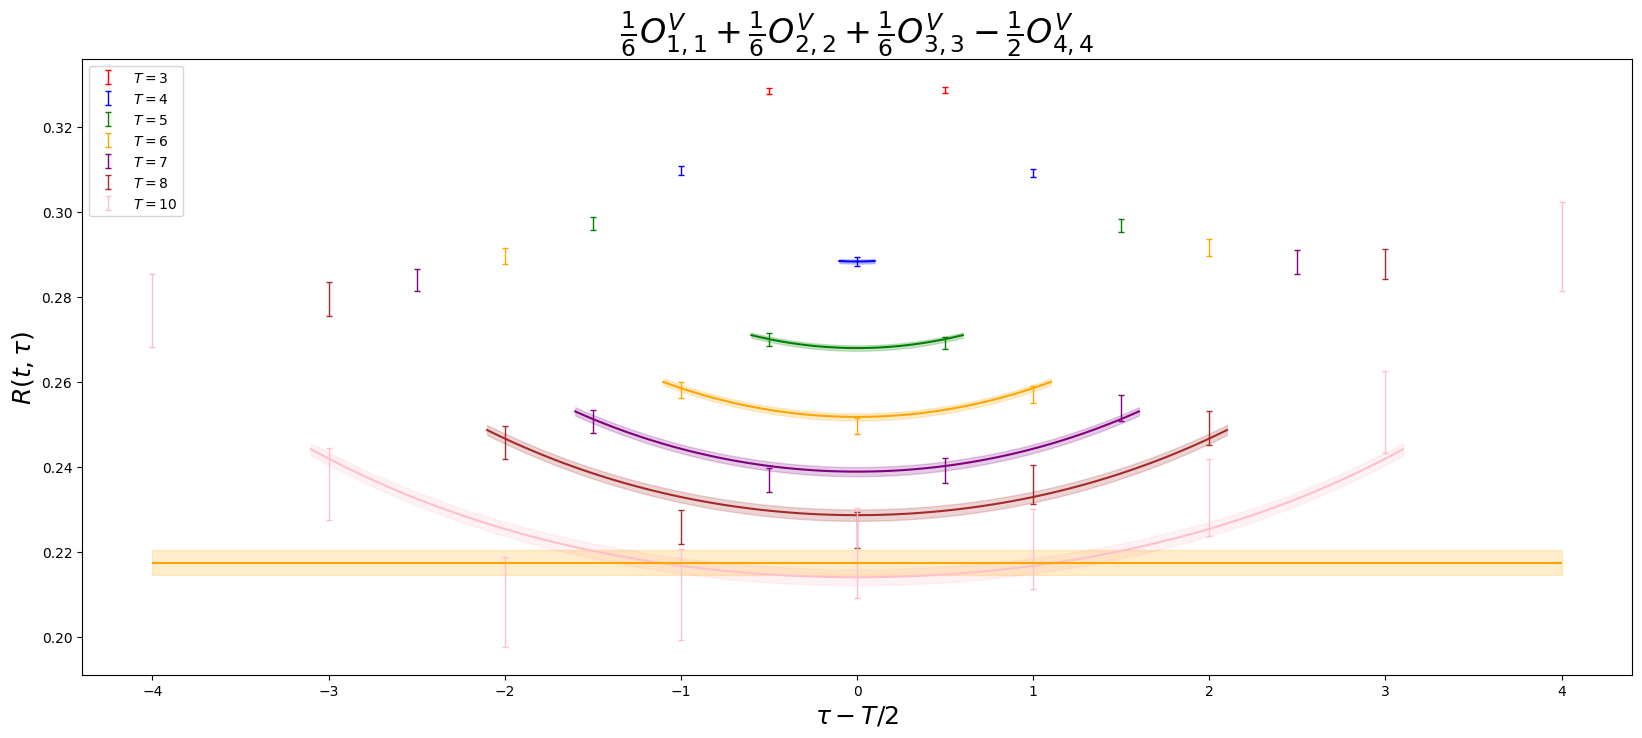

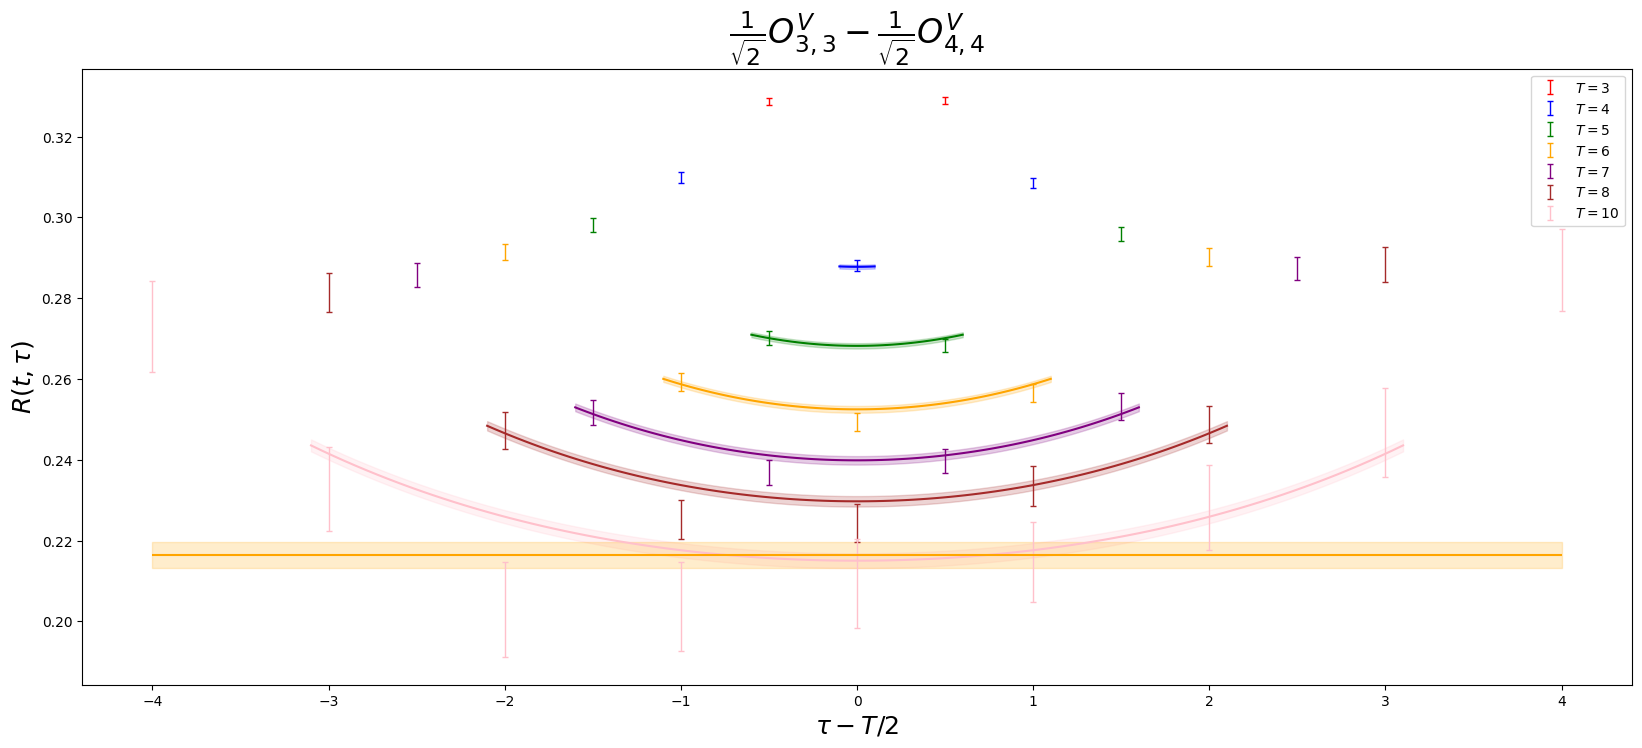

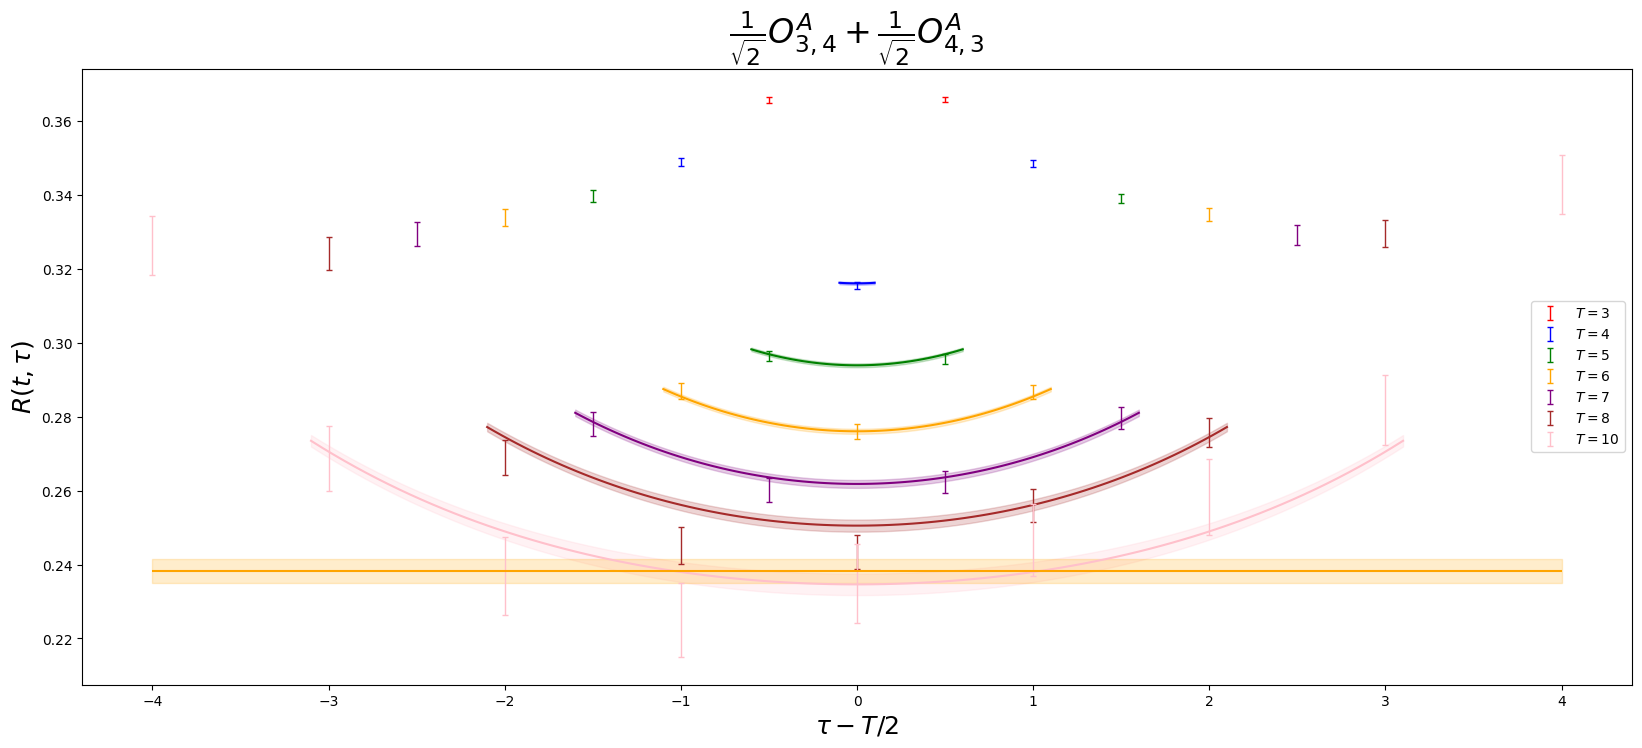

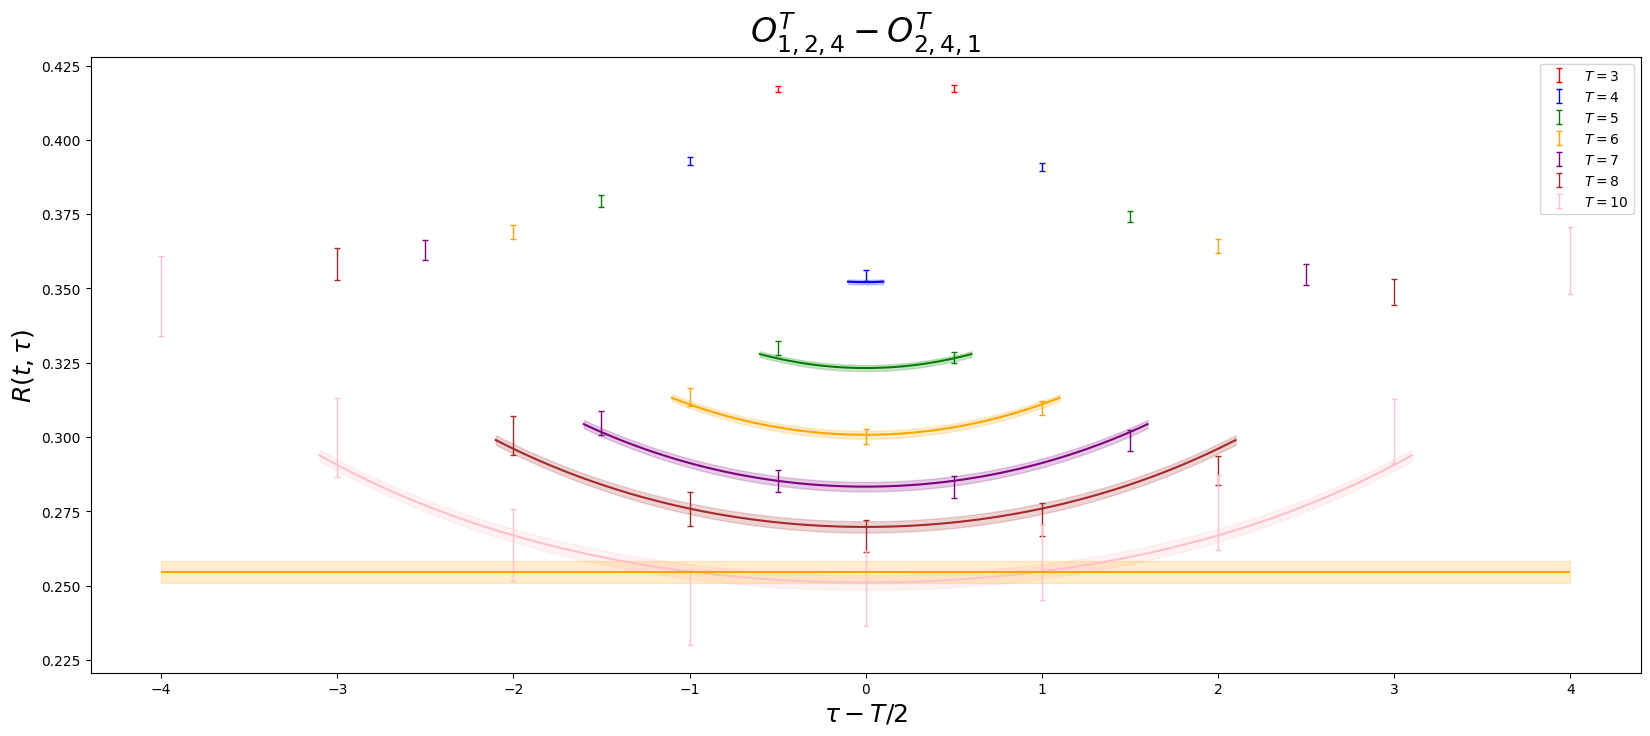

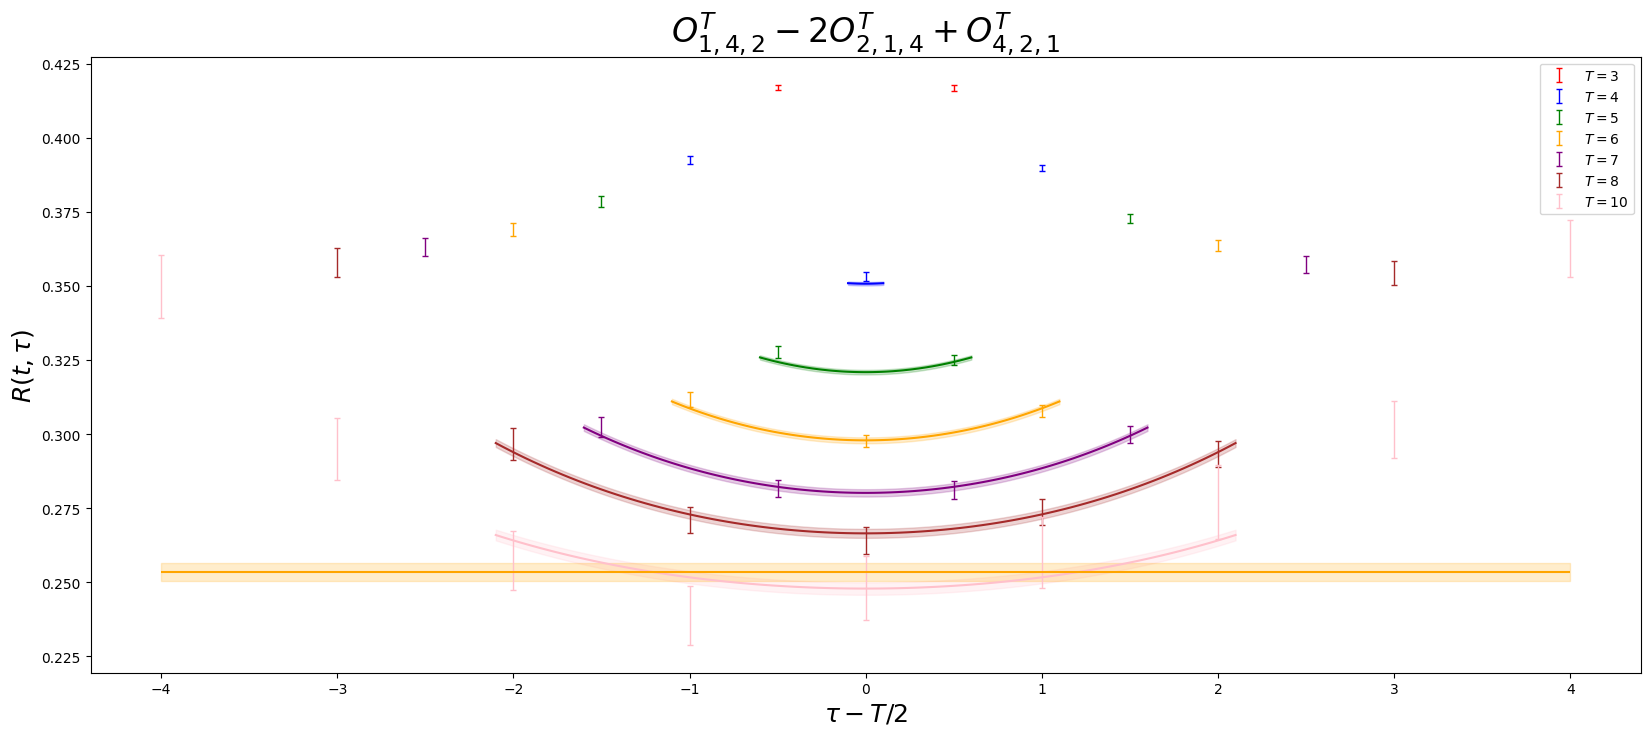


Fit routine succesfully completed!



In [5]:
fit_res1 = opAnalyzer1.fit_ratio(verbose=True, show=True,save=True, chi2_threshold=5.0, prior="flat")#prior="guess")


Preparing the fit for the ratio of the correlators...


Looping over the operators, performing for each a series of fit: ...



100%|██████████| 9/9 [07:04<00:00, 47.21s/it]



Plotting the fit of the ratios for each operator ...



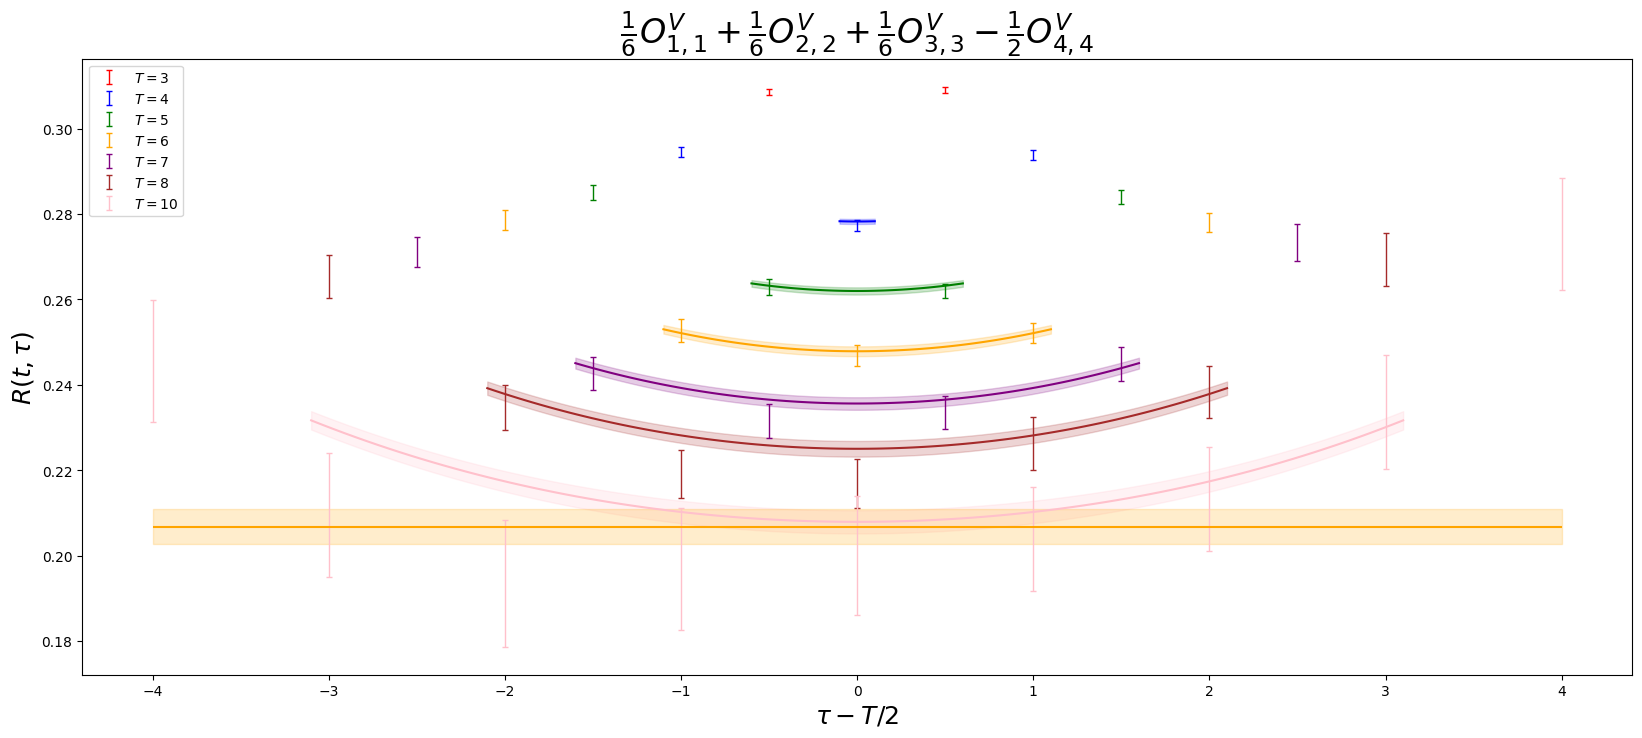

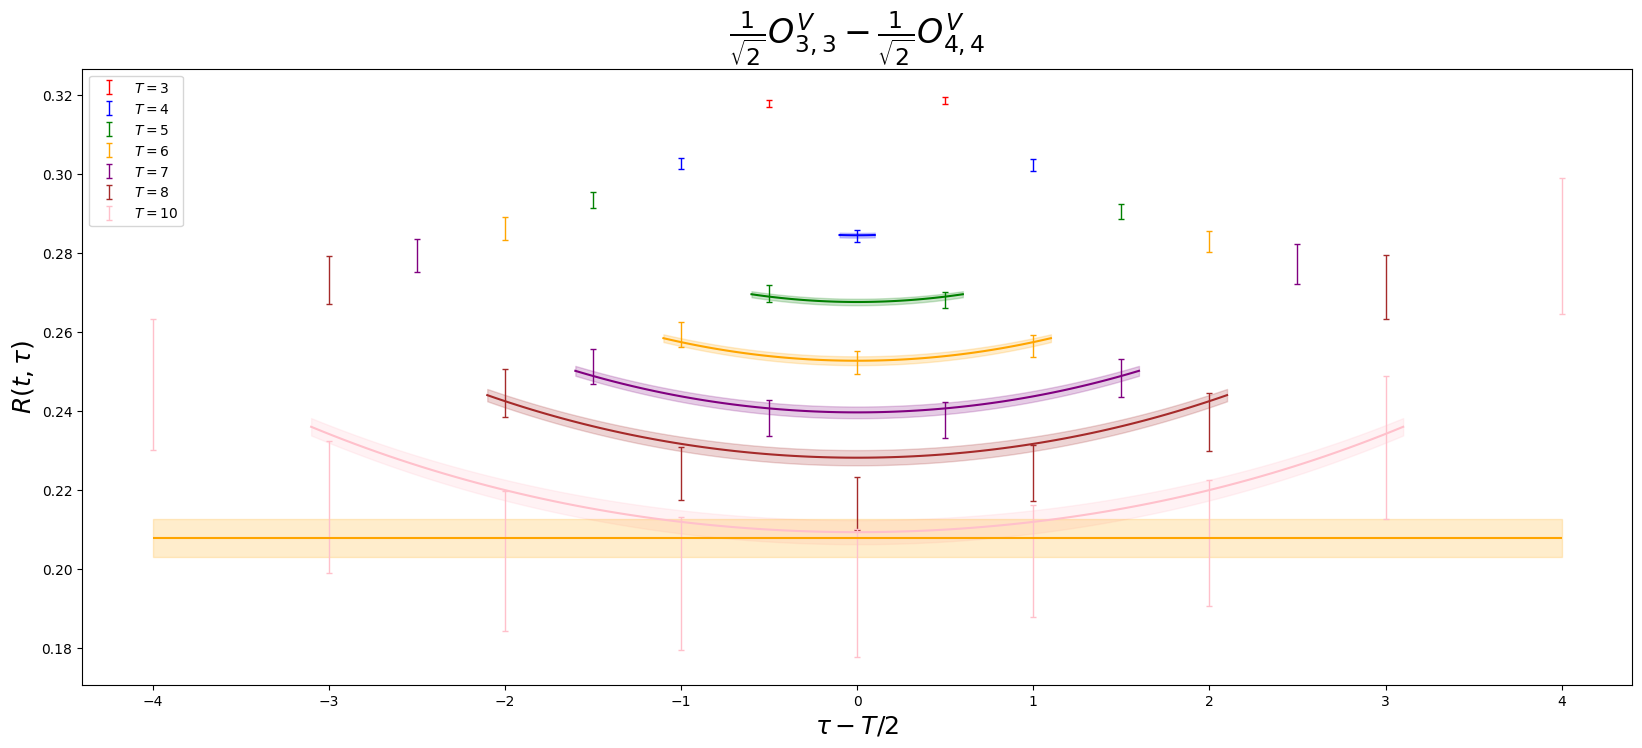

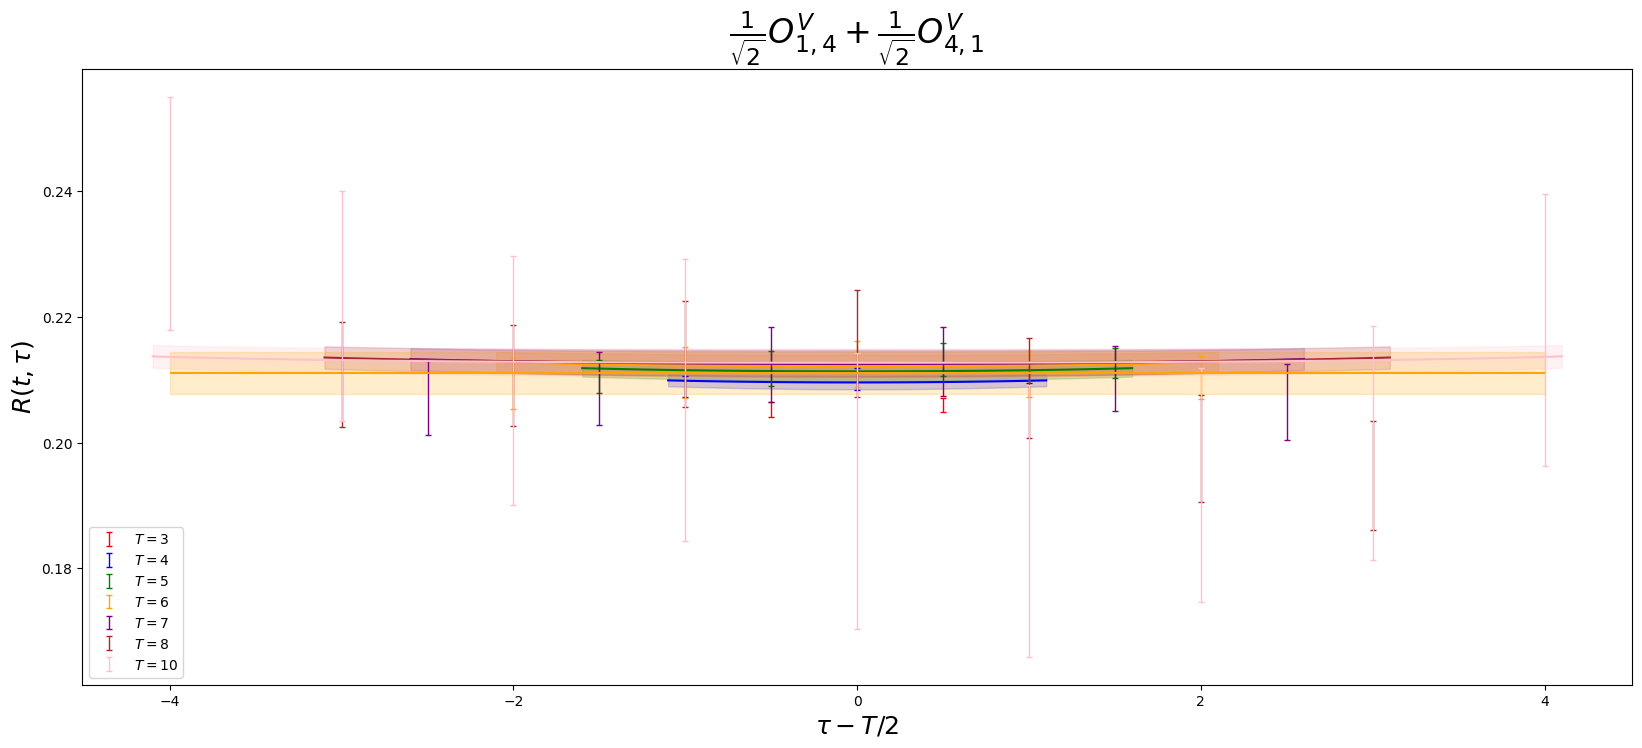

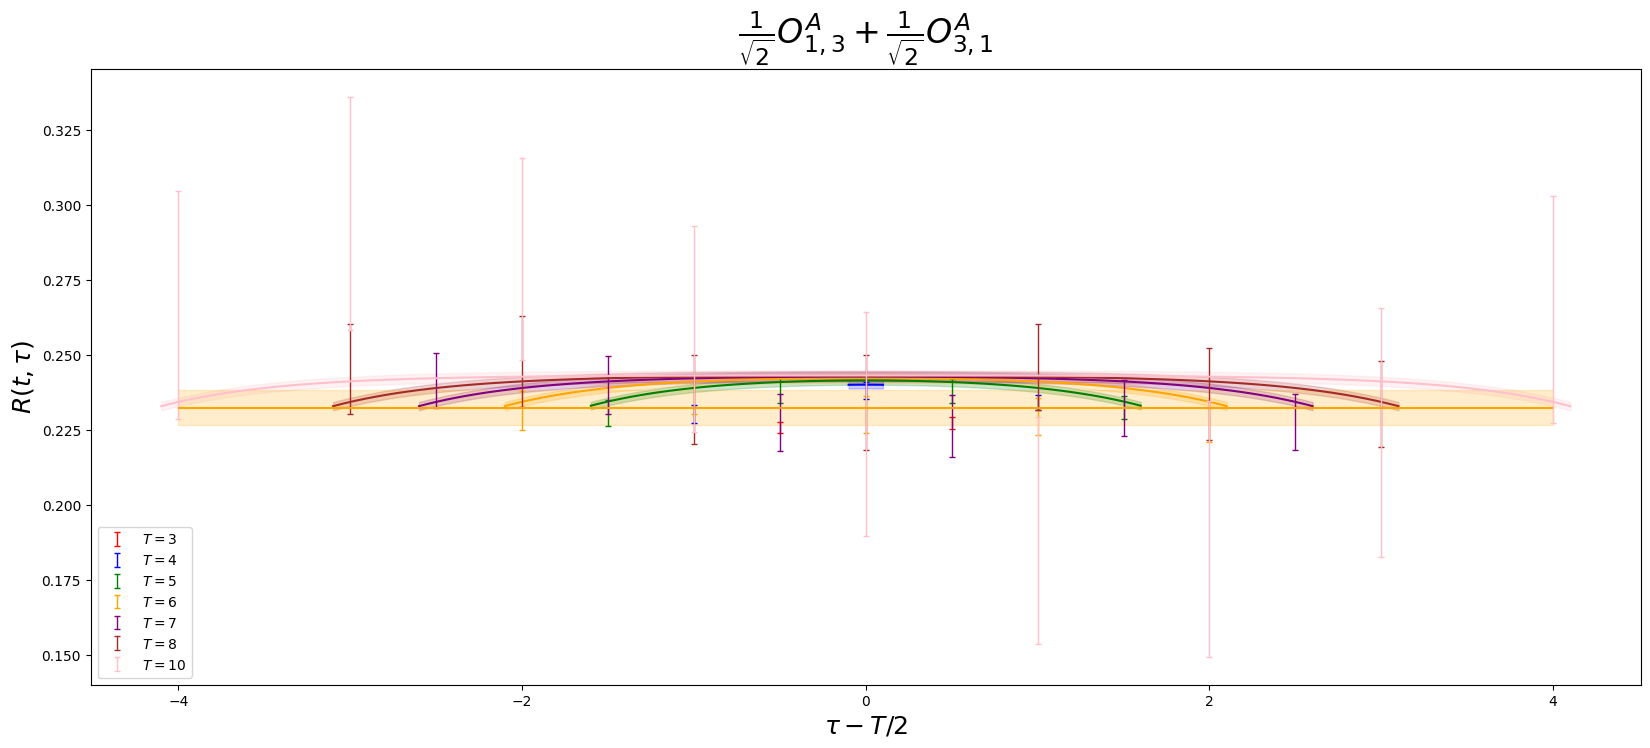

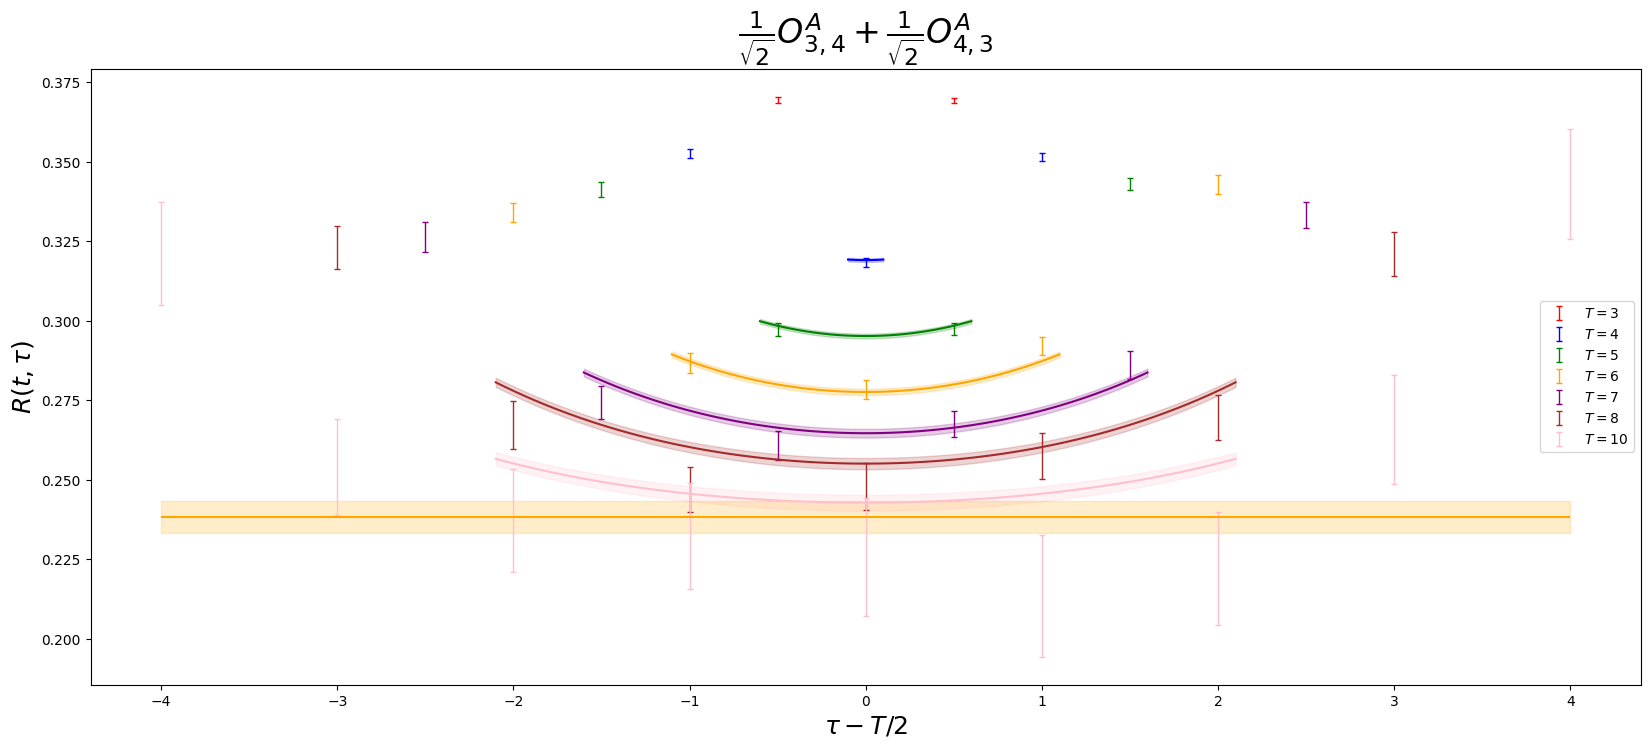

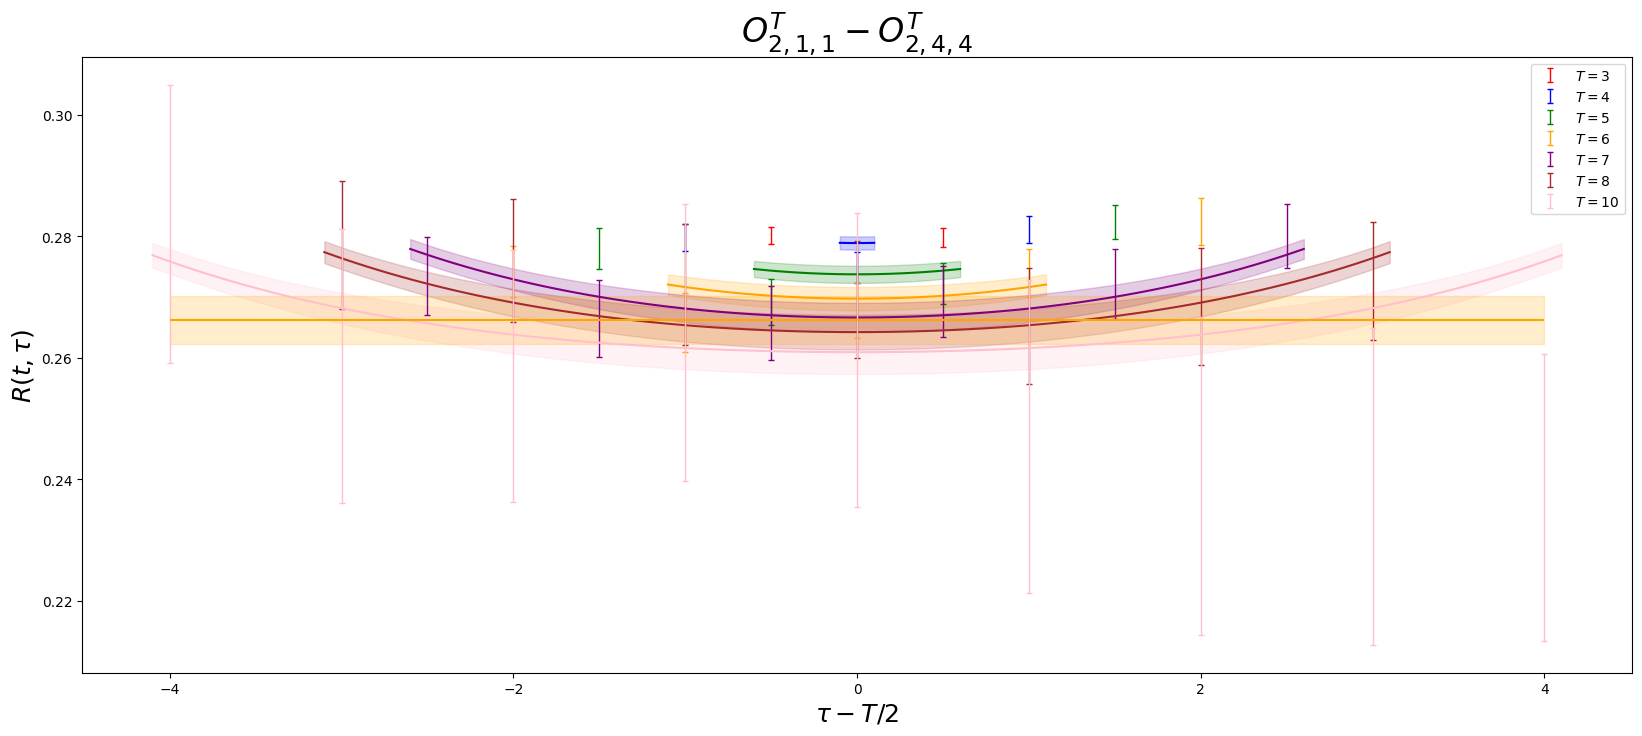

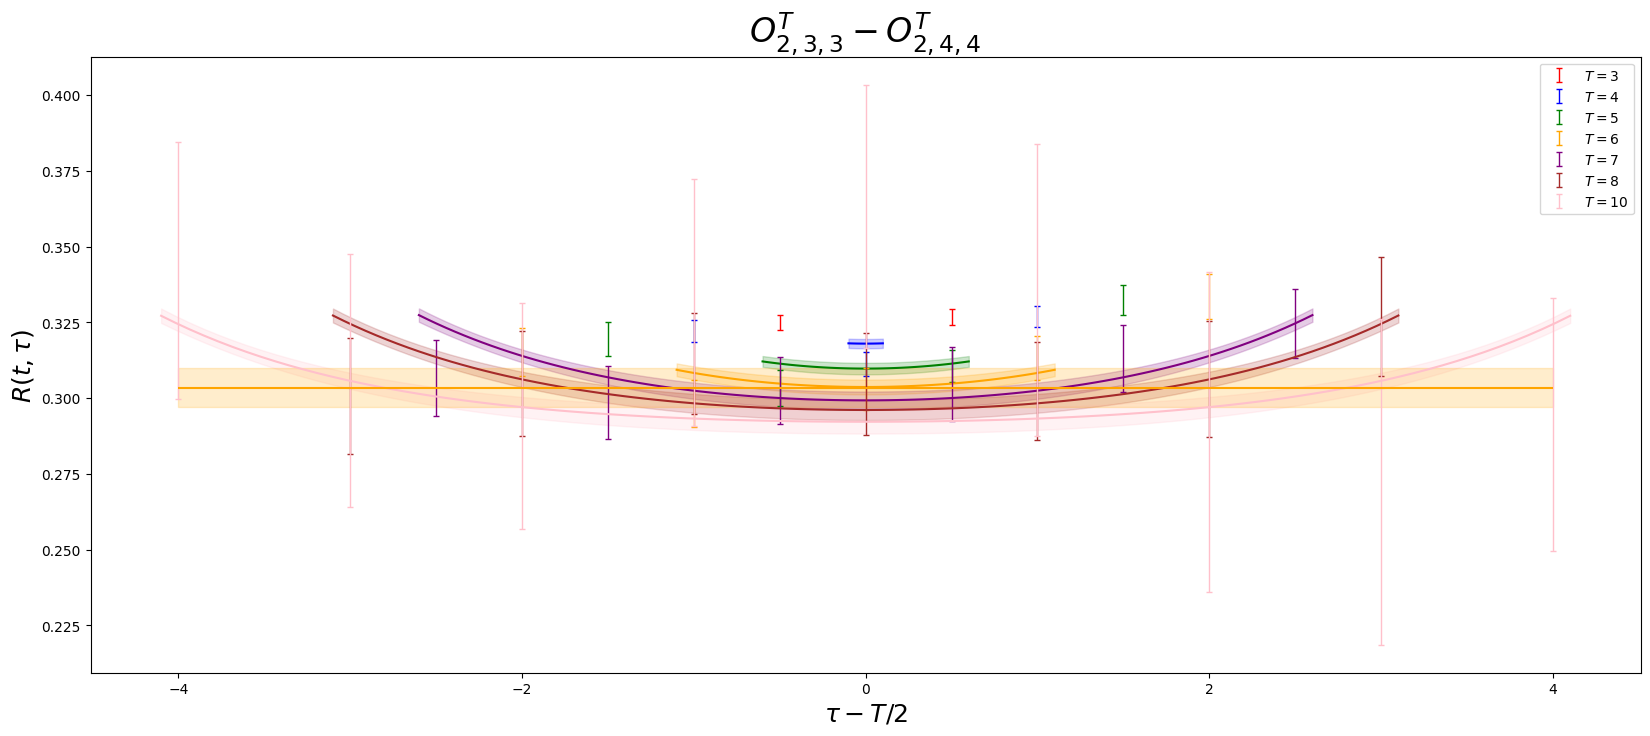

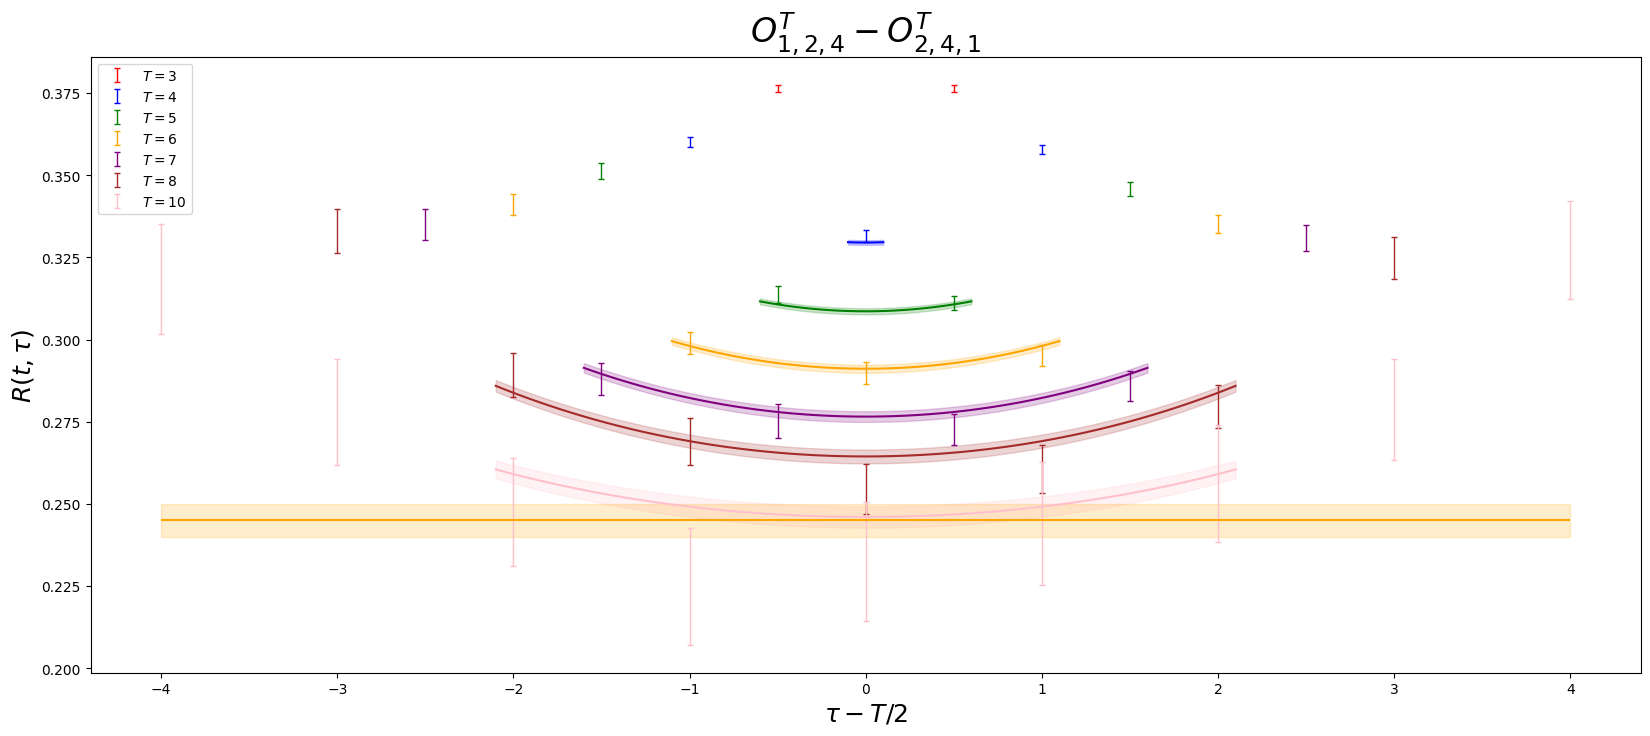

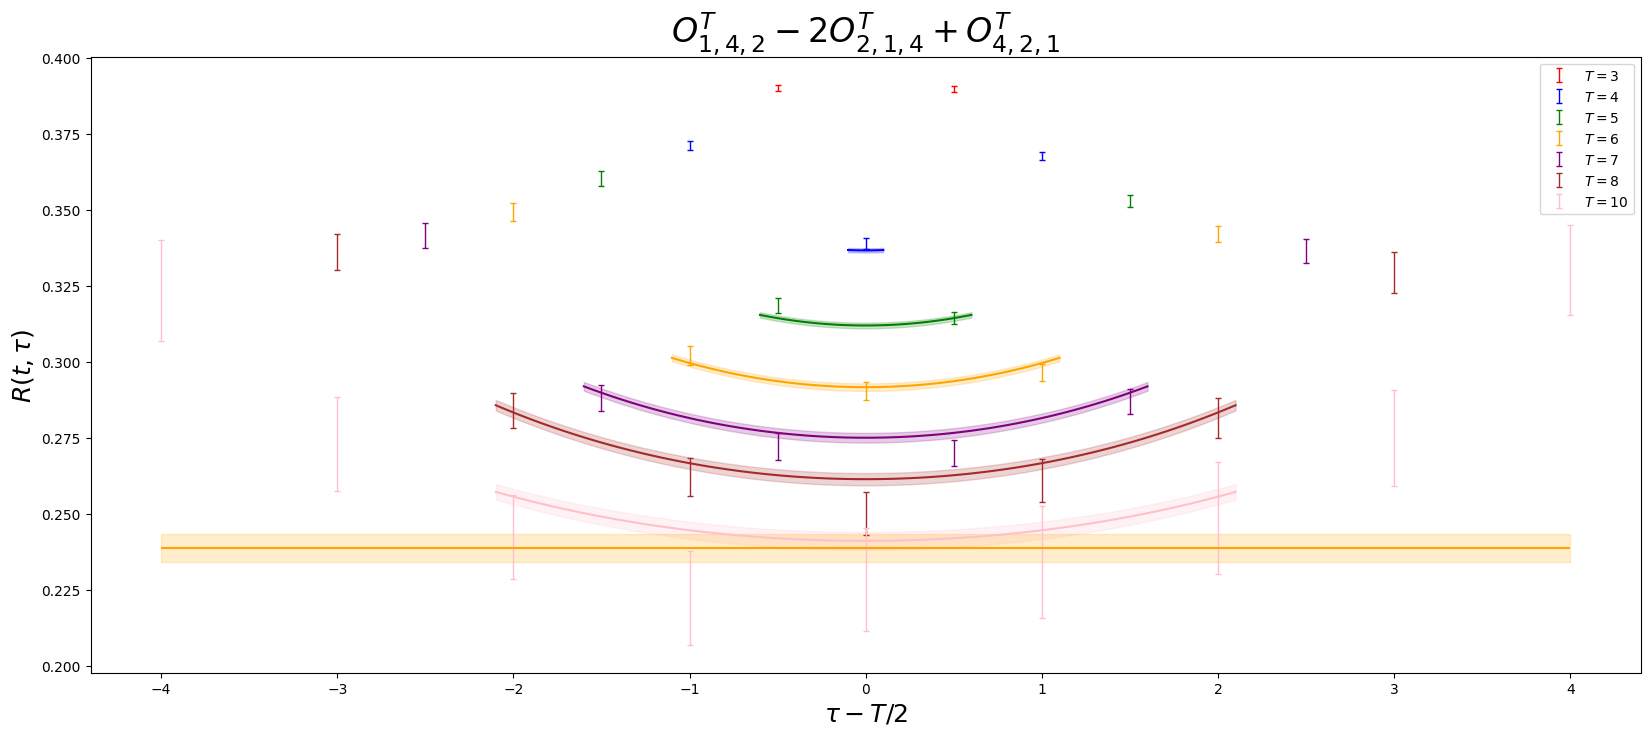


Fit routine succesfully completed!



In [17]:
fit_res2 = opAnalyzer2.fit_ratio(verbose=True, show=True,save=True,  chi2_threshold=1.0, prior="guess")#prior="guess")

In [7]:
fit_res1

[FitState(fit_results=[FitResult[ ([4 2],[10  8]), resample:jkn]:
   𝜒²/dof [dof] = 0.827 [22]
   AIC = -18.5 
     - A00: 0.0539(18)  [1(100)]
     - dE1(0): 0.463(29)  [0.16(82)]
     - A01: 0.0355(11)  [1(100)]
 , FitResult[ ([4 2],[10  8]), resample:jkn]:
   𝜒²/dof [dof] = 0.783 [20]
   AIC = -16.8 
     - A00: 0.0541(19)  [1(100)]
     - dE1(0): 0.462(31)  [0.16(82)]
     - A01: 0.0352(11)  [1(100)]
 , FitResult[ ([4 2],[10  8]), resample:jkn]:
   𝜒²/dof [dof] = 0.825 [22]
   AIC = -15.5 
     - A00: 0.0533(38)  [1(100)]
     - dE1(0): 0.454(52)  [0.16(82)]
     - A01: 0.0360(31)  [1(100)]
     - A11: -0.0017(90)  [1(100)]
 , FitResult[ ([4 2],[10  8]), resample:jkn]:
   𝜒²/dof [dof] = 0.825 [22]
   AIC = -15.5 
     - A00: 0.0533(38)  [1(100)]
     - dE1(0): 0.454(52)  [0.16(82)]
     - A01: 0.0360(31)  [1(100)]
     - A11: -0.0017(90)  [1(100)]
 , FitResult[ ([4 2],[10  8]), resample:jkn]:
   𝜒²/dof [dof] = 0.776 [20]
   AIC = -13.8 
     - A00: 0.0528(39)  [1(100)]
     - dE1(0

In [8]:
fit_res2

[FitState(fit_results=[FitResult[ ([4 2],[10  8]), resample:jkn]:
   𝜒²/dof [dof] = 0.612 [22]
   AIC = -23.2 
     - A00: 0.0545(38)  [1(100)]
     - dE1(0): 0.314(34)  [0.5(2.7)]
     - A01: 0.0347(19)  [1(100)]
 , FitResult[ ([4 2],[10  8]), resample:jkn]:
   𝜒²/dof [dof] = 0.513 [22]
   AIC = -22.4 
     - A00: 0.036(19)  [1(100)]
     - dE1(0): 0.232(59)  [0.5(2.7)]
     - A01: 0.052(17)  [1(100)]
     - A11: -0.024(20)  [1(100)]
 , FitResult[ ([4 2],[10  8]), resample:jkn]:
   𝜒²/dof [dof] = 0.513 [22]
   AIC = -22.4 
     - A00: 0.036(19)  [1(100)]
     - dE1(0): 0.232(59)  [0.5(2.7)]
     - A01: 0.052(17)  [1(100)]
     - A11: -0.024(20)  [1(100)]
 , FitResult[ ([4 2],[10  8]), resample:jkn]:
   𝜒²/dof [dof] = 0.673 [20]
   AIC = -19 
     - A00: 0.0547(41)  [1(100)]
     - dE1(0): 0.316(37)  [0.5(2.7)]
     - A01: 0.0347(19)  [1(100)]
 , FitResult[ ([4 2],[10  8]), resample:jkn]:
   𝜒²/dof [dof] = 0.558 [20]
   AIC = -18.2 
     - A00: 0.035(20)  [1(100)]
     - dE1(0): 0.231(

In [9]:
for iop,res in enumerate(fit_res1):
    result = res.model_average()
    mat = gv.gvar( result["est"]["A00"], result["err"]["A00"] )
    Klist = opAnalyzer1.get_Klist()
    mat / Klist[iop]
    [fit.chi2/fit.dof for fit in res]

0.18899(50)

[0.8270961042408991,
 0.7830042519039528,
 0.8253747459423557,
 0.8253747459423557,
 0.7757318936503458,
 0.8551074129430256,
 0.8888013279635308,
 0.8305033796078929]

0.18817(60)

[1.0931889307304217,
 1.0335985011271247,
 1.0188238162431686,
 1.090034346827816,
 1.090034346827816,
 1.0323536013810222,
 1.0784648308005103,
 1.0002280644740749]

0.2096(15)

[1.2311667585618211,
 1.2311667585618211,
 1.2292304536262109,
 1.482469042570898,
 0.9986485959907315,
 1.0998252935052824,
 1.3939877134192522,
 1.5530748814498572,
 1.313907451123586,
 1.3369643700547285,
 1.483993839605965,
 1.7168710842999262]

0.22256(52)

[0.8846249003691017,
 0.8831956996334686,
 0.8831956996334686,
 0.9593845522574578,
 0.9859399983787355,
 0.9568019257772782]

0.22067(47)

[0.8489206923940185,
 0.8485448787516571,
 0.8468912037534198,
 0.8468912037534198,
 0.8410387171333199,
 0.9398838537279991,
 0.9285442571142604,
 1.0657080446278901,
 1.0167478588749053,
 1.080656690845993,
 1.051105357338495,
 1.001586750326162]

In [18]:
for iop,res in enumerate(fit_res2):
    result = res.model_average()
    mat = gv.gvar( result["est"]["A00"], result["err"]["A00"] )
    Klist = opAnalyzer2.get_Klist()
    mat / Klist[iop]
    [fit.chi2/fit.dof for fit in res]

0.1577(14)

[0.8282874687473765,
 0.7867270521238354,
 0.7867270521238354,
 0.9089431983592334,
 0.8596703398689896,
 1.006330377590844,
 0.9366966999239543,
 0.7893624648988904,
 1.1310688950864423,
 1.0323100556756066,
 0.9903893745980513,
 1.1670264611904584]

0.1490(27)

[1.138495386708385,
 1.043900878055193,
 1.043900878055193,
 1.1792320820024338,
 1.0437798505370628,
 1.2644283775509404,
 1.084079282180912,
 1.1210084304421706,
 1.1113756849820033,
 1.4170065157849827,
 1.426625260272075,
 1.5109596335966025]

0.21265(25)

[0.9297566787674569, 1.0864285483620497]

0.24323(23)

[1.4662926407815733,
 1.4993976758784824,
 1.4418356474837914,
 1.4418356474837914]

0.22769(77)

[1.320879255964534,
 1.2479457796698257,
 1.312031020779282,
 1.312031020779282,
 1.223421485456448,
 1.341679073792479,
 1.2603902529682454,
 1.2458422074899562,
 1.28257105814993,
 1.348872220182235,
 1.2609461439822476,
 1.2003728136970606]

0.25602(59)

[0.9643951365633274,
 0.9933378359537886,
 0.9624395447983921,
 0.9624395447983921]

0.28823(63)

[0.9349372557931765, 0.9198920459488662, 0.870730632820628, 0.870730632820628]

0.2059(17)

[1.1209373233628988,
 1.01567800513735,
 1.01567800513735,
 1.1806925170698275,
 1.0514038988209002,
 1.24583814649917,
 1.135464049617747,
 1.1681353668883765,
 1.3438330580735978,
 1.088779465602107,
 1.0627405647952914,
 1.4442001608688775]

0.2003(12)

[1.0873108539137497,
 1.0318455378707183,
 1.0318455378707183,
 1.1427908953557813,
 1.0572595628415724,
 1.1858098368280663,
 1.1064061614406404,
 1.2467074134466858,
 1.1741176529905344,
 1.0886426932687898,
 1.3399946102378109,
 1.0336325739194447]

In [11]:
for opAnalyzer in [opAnalyzer1, opAnalyzer2]:
    opAnalyzer.get_M_from_R(moments=True, renormalize=True)

    ""

    opAnalyzer.get_M_from_S(method="fit", moments=True, renormalize=True)

    ""

    opAnalyzer.get_M_from_S(method="finite differences", moments=True, renormalize=True)

array([0.1818(43), 0.1802(42), 0.1972(64), 0.2191(53), 0.2177(53)],
      dtype=object)

''

array([[0 ± 0, 0.2343(57), 0.2136(59), 0.2079(66), 0 ± 0, 0 ± 0, 0 ± 0],
       [0 ± 0, 0.2335(57), 0.2132(59), 0.2041(73), 0 ± 0, 0 ± 0, 0 ± 0],
       [0 ± 0, 0.2661(86), 0.2420(83), 0.2270(88), 0 ± 0, 0 ± 0, 0 ± 0],
       [0 ± 0, 0.2834(72), 0.2544(74), 0.2458(87), 0 ± 0, 0 ± 0, 0 ± 0],
       [0 ± 0, 0.2811(70), 0.2530(70), 0.2446(80), 0 ± 0, 0 ± 0, 0 ± 0]],
      dtype=object)

''

array([[0 ± 0, 0.2343(59), 0.2149(63), 0.2122(71), 0.199(11), 0.200(17),
        0 ± 0],
       [0 ± 0, 0.2344(60), 0.2153(65), 0.2117(74), 0.191(12), 0.185(18),
        0 ± 0],
       [0 ± 0, 0.2649(87), 0.2436(87), 0.2316(92), 0.219(12), 0.230(19),
        0 ± 0],
       [0 ± 0, 0.2850(74), 0.2567(77), 0.2524(89), 0.238(14), 0.239(21),
        0 ± 0],
       [0 ± 0, 0.2827(72), 0.2552(72), 0.2511(81), 0.238(12), 0.238(18),
        0 ± 0]], dtype=object)

array([0.1492(44), 0.1579(43), 0.2124(52), 0.2415(76), 0.2273(72),
       0.2528(60), 0.2866(68), 0.2042(51), 0.1985(49)], dtype=object)

''

array([[0 ± 0, 0.2326(58), 0.2067(59), 0.1897(75), 0 ± 0, 0 ± 0, 0 ± 0],
       [0 ± 0, 0.2376(61), 0.2090(63), 0.1886(86), 0 ± 0, 0 ± 0, 0 ± 0],
       [0 ± 0, 0.2118(58), 0.2076(78), 0.2069(90), 0 ± 0, 0 ± 0, 0 ± 0],
       [0 ± 0, 0.2324(86), 0.228(13), 0.237(15), 0 ± 0, 0 ± 0, 0 ± 0],
       [0 ± 0, 0.2670(87), 0.2436(89), 0.221(11), 0 ± 0, 0 ± 0, 0 ± 0],
       [0 ± 0, 0.2641(69), 0.2631(95), 0.262(10), 0 ± 0, 0 ± 0, 0 ± 0],
       [0 ± 0, 0.3002(87), 0.301(14), 0.306(16), 0 ± 0, 0 ± 0, 0 ± 0],
       [0 ± 0, 0.2754(69), 0.2459(79), 0.2356(96), 0 ± 0, 0 ± 0, 0 ± 0],
       [0 ± 0, 0.2752(71), 0.2405(75), 0.2264(93), 0 ± 0, 0 ± 0, 0 ± 0]],
      dtype=object)

''

array([[0 ± 0, 0.2311(61), 0.2096(72), 0.1999(87), 0.177(13), 0.170(20),
        0 ± 0],
       [0 ± 0, 0.2361(65), 0.2121(80), 0.2018(96), 0.169(15), 0.165(25),
        0 ± 0],
       [0 ± 0, 0.2126(66), 0.2087(90), 0.210(11), 0.198(20), 0.181(36),
        0 ± 0],
       [0 ± 0, 0.231(10), 0.228(15), 0.236(20), 0.253(40), 0.224(62),
        0 ± 0],
       [0 ± 0, 0.2664(91), 0.246(10), 0.232(12), 0.202(19), 0.193(29),
        0 ± 0],
       [0 ± 0, 0.2643(78), 0.265(11), 0.267(14), 0.254(25), 0.227(41),
        0 ± 0],
       [0 ± 0, 0.300(10), 0.300(17), 0.303(23), 0.317(40), 0.343(74),
        0 ± 0],
       [0 ± 0, 0.2764(77), 0.2489(89), 0.243(11), 0.224(18), 0.212(30),
        0 ± 0],
       [0 ± 0, 0.2750(74), 0.2435(84), 0.236(10), 0.215(17), 0.203(28),
        0 ± 0]], dtype=object)

In [12]:
for opAnalyzer in [opAnalyzer1, opAnalyzer2]:
    opAnalyzer.get_M_from_R(moments=False, renormalize=False)

array([0.05295(16), 0.07425(25), -0.07967(63), 0.12523(31), 0.24885(55)],
      dtype=object)

array([0.05028(88), 0.07101(96), -0.078730(92), 0.040719(29),
       -0.09094(31), -0.13345(25), -0.07565(17), 0.1501(10), 0.2698(16)],
      dtype=object)

In [13]:
opAnalyzer1.display_operators()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [14]:
opAnalyzer2.display_operators()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [15]:
opAnalyzer1.get_Klist()
opAnalyzer2.get_Klist()

[0.284385(96), 0.40218(14), -0.40218(14), 0.56877(19), 1.13754(38)]

[0.32895(19),
 0.43919(29),
 -0.37024 ± 9.1e-20,
 0.167872(24),
 -0.39827(32),
 -0.523599 ± 1.8e-19,
 -0.261799 ± 9.1e-20,
 0.73146(34),
 1.35257(75)]

In [16]:
ok1 = np.asarray( [gv.gvar( res.model_average()["est"]["dE1(0)"], res.model_average()["err"]["dE1(0)"] ) for iop,res in enumerate(fit_res1) ] )
ok1
opAnalyzer1.lattice_to_MeV(ok1)
opAnalyzer1.get_dE()
""

ok2 = np.asarray( [gv.gvar( res.model_average()["est"]["dE1(0)"], res.model_average()["err"]["dE1(0)"] ) for iop,res in enumerate(fit_res2) ] )
ok2
opAnalyzer2.lattice_to_MeV(ok2)
np.sqrt( opAnalyzer2.get_dE()**2 - opAnalyzer2.P_vec @ opAnalyzer2.P_vec ) 
""

opAnalyzer2.lattice_to_MeV(np.sqrt(opAnalyzer2.P_vec @ opAnalyzer2.P_vec))
""

opAnalyzer2.lattice_to_MeV( np.sqrt( ok2**2 - opAnalyzer2.P_vec @ opAnalyzer2.P_vec ) )

array([0.4602(22), 0.4368(27), 0.5172(64), 0.5059(19), 0.5224(19)],
      dtype=object)

array([780.8(4.5), 741.1(5.2), 877(11), 858.3(4.4), 886.3(4.4)],
      dtype=object)

0.082262195(35)

''

array([0.2690(45), 0.2275(67), 2.089(42), 6.135(61), 0.6127(63),
       0.444(16), 0.886(14), 0.3721(54), 0.3976(36)], dtype=object)

array([456.5(7.8), 386(11), 3545(72), 1.041(11)e+04, 1040(11), 753(28),
       1504(25), 631.4(9.5), 674.7(6.5)], dtype=object)

0.082260622(13)

''

444.2(1.5)

''

/tmp/ipykernel_2919289/71787888.py:16: RuntimeWarning: invalid value encountered in sqrt
  opAnalyzer2.lattice_to_MeV( np.sqrt( ok2**2 - opAnalyzer2.P_vec @ opAnalyzer2.P_vec ) )


array([105(33), nan ± nan, 3517(73), 1.040(11)e+04, 940(12), 607(34),
       1436(26), 449(13), 507.8(8.3)], dtype=object)